# Versuch 3: Leucht- und Laserdioden

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts)
(I will then put everything in a collective notebook for the advisors)

In [1]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Strom-Spannungskennlinie der Leuchtdiode

    Ablauf:
    1.) Lese Daten ein
    2.) inkludiere Fehler
    3.) Plot der Kennlinie
    4.) Fit mit scipy.optimize
    5.) Berechnung der Frequenz

#### Teil 1: Blaue LED

In [3]:
data = pd.read_csv("LED_blau_V_A.csv")

In [4]:
data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)

In [5]:
data["Error U Verbraucher / V"] = 0.1
data["Error U Diode / V"] = 0.001
data["Error I Diode / mA"] = 0.01

In [6]:
data

,U Verbraucher/V,U Diode/V,I Diode/mA,Error U Verbraucher / V,Error U Diode / V,Error I Diode / mA
0,1.0,0.988,0.00,0.1,0.001,0.01
1,1.5,1.510,0.00,0.1,0.001,0.01
2,2.5,2.450,0.01,0.1,0.001,0.01
3,3.2,2.815,1.25,0.1,0.001,0.01
4,3.5,2.862,1.99,0.1,0.001,0.01
5,4.0,2.926,3.44,0.1,0.001,0.01
6,4.5,2.978,5.08,0.1,0.001,0.01
7,5.0,3.013,6.53,0.1,0.001,0.01
8,5.5,3.047,8.06,0.1,0.001,0.01
9,6.0,3.081,9.90,0.1,0.001,0.01


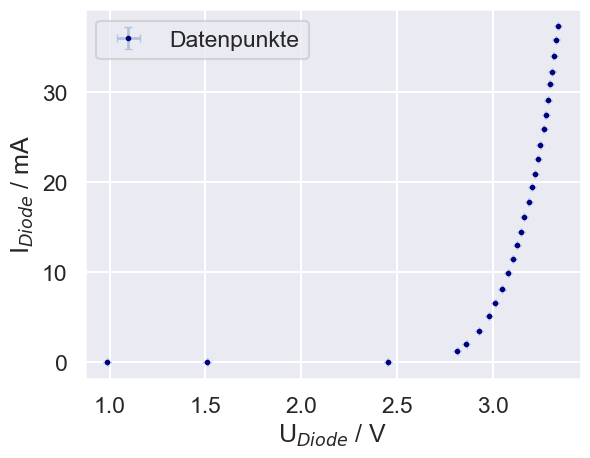

In [7]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("U$_{{Diode}}$ / V")
plt.ylabel("I$_{{Diode}}$ / mA")
plt.errorbar(x=data[" U Diode/V"], xerr=data["Error U Diode / V"], 
             y=data[" I Diode/mA"] , yerr=data["Error I Diode / mA"],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.legend()
#plt.savefig("I_U_LED_blaueLED.png", dpi=500, bbox_inches="tight")

In [8]:
import scipy.optimize
def fit_function(p,x):
    k, d = p
    return k*x + d

def fit_function_plot(x,k,d):
    return k*x + d

#### one needs to test a little bit how many datapoints one wants to include

In [9]:
# first guess, but we want to have the errors in x and y included in the fit
#p_opt, p_var = scipy.optimize.curve_fit(fit_function, data[" U Diode/V"][7:],
#                                        data[" I Diode/mA"][7:])
#print("k =",p_opt[0],"+/-",np.sqrt(p_var[0][0]))
#print("d =",p_opt[1],"+/-",np.sqrt(p_var[1][1]))


#determined values:
#k = 96.41904022629207 +/- 4.228917521625311
#d = -287.60823055829565 +/- 13.57890088633359

In [10]:
x_data = data[" U Diode/V"][19:].to_numpy()
x_er = data["Error U Diode / V"][19:].to_numpy()
y_data = data[" I Diode/mA"][19:].to_numpy()
y_er = data["Error I Diode / mA"][19:].to_numpy()

In [11]:
# use ODR
from scipy import odr

data_odr = odr.RealData(x_data, y_data,
                    sx=x_er, sy=y_er)
odr = odr.ODR(data_odr, odr.Model(fit_function),beta0=[0., 1.])
out = odr.run()

In [12]:
p_opt = out.beta
p_err = out.sd_beta
red_chi_squared = out.res_var
print("fit parameter and 1-sigma error")
print("———————————–")
for i in range(len(p_opt)):
    print(str(p_opt[i]) + " +- " +str(p_err[i]))
print("reduced chi squared = ", red_chi_squared)

fit parameter and 1-sigma error
———————————–
153.66012501751987 +- 2.908347798791255
-475.7782328085739 +- 9.603628337953692
reduced chi squared =  1.7114811855533338


In [13]:
#create x for plotting with the linear fit
linear_fit_U = np.arange(3,3.4,0.001)

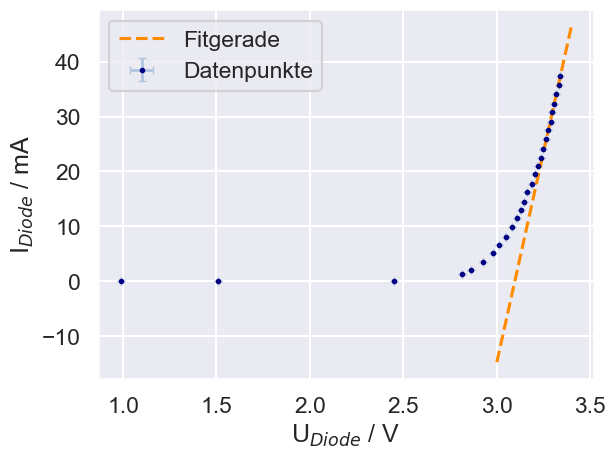

In [14]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("U$_{{Diode}}$ / V")
plt.ylabel("I$_{{Diode}}$ / mA")
plt.errorbar(x=data[" U Diode/V"], xerr=data["Error U Diode / V"], 
             y=data[" I Diode/mA"] , yerr=data["Error I Diode / mA"],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")

plt.plot(linear_fit_U, fit_function_plot(linear_fit_U,p_opt[0],p_opt[1]),"--", color="darkorange", label="Fitgerade")
plt.legend()
plt.savefig("I_U_LED_blaueLED_FIT.png", dpi=500, bbox_inches="tight")

In [15]:
d = ufloat(p_opt[1],p_err[1])
k = ufloat(p_opt[0],p_err[0])
U_d = -d/k
U_d

3.09630252321041+/-0.085677265519711

In [16]:
from scipy.constants import e, h, c

$\nu = \dfrac{e \cdot U_d}{h}$

In [17]:
nu = e*U_d/h
nu

748682619136316.0+/-20716670631791.426

In [18]:
lambda_blue = c/nu
lambda_blue

4.004266298392797e-07+/-1.1080137818810805e-08

#### Teil 2: Rote LED

In [19]:
data_red = pd.read_csv("LED_rot_V_A_I.csv", encoding= 'unicode_escape')

In [20]:
# we currently only need the first three colums:
data_red.drop(data_red.columns[len(data_red.columns)-1], axis=1, inplace=True)
data_red.drop(data_red.columns[len(data_red.columns)-1], axis=1, inplace=True)
data_red.drop(data_red.columns[len(data_red.columns)-1], axis=1, inplace=True)

In [21]:
data_red

,U Verbraucher/V,U Diode/V,I Diode/mA
0,2.0,1.645,1.22
1,3.0,1.714,4.14
2,4.0,1.759,7.35
3,5.0,1.795,10.76
4,6.0,1.825,14.02
5,7.0,1.851,17.22
6,7.5,1.862,18.73
7,8.0,1.875,20.40
8,9.0,1.900,23.85
9,10.0,1.922,27.07


In [22]:
data_red["Error U Verbraucher / V"] = 0.1
data_red["Error U Diode / V"] = 0.001
data_red["Error I Diode / mA"] = 0.01

In [23]:
data_red

,U Verbraucher/V,U Diode/V,I Diode/mA,Error U Verbraucher / V,Error U Diode / V,Error I Diode / mA
0,2.0,1.645,1.22,0.1,0.001,0.01
1,3.0,1.714,4.14,0.1,0.001,0.01
2,4.0,1.759,7.35,0.1,0.001,0.01
3,5.0,1.795,10.76,0.1,0.001,0.01
4,6.0,1.825,14.02,0.1,0.001,0.01
5,7.0,1.851,17.22,0.1,0.001,0.01
6,7.5,1.862,18.73,0.1,0.001,0.01
7,8.0,1.875,20.40,0.1,0.001,0.01
8,9.0,1.900,23.85,0.1,0.001,0.01
9,10.0,1.922,27.07,0.1,0.001,0.01


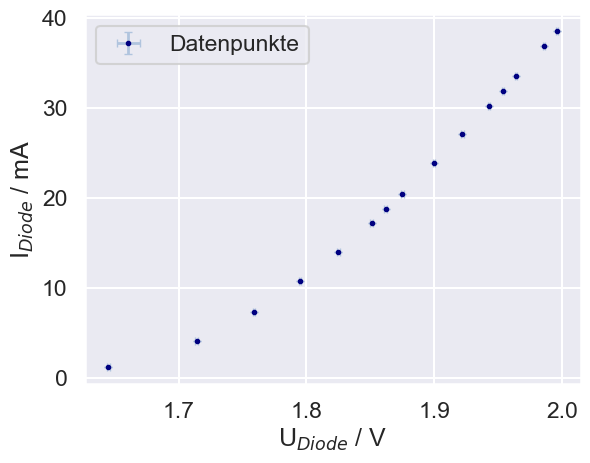

In [24]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("U$_{{Diode}}$ / V")
plt.ylabel("I$_{{Diode}}$ / mA")
plt.errorbar(x=data_red[" U Diode/V"], xerr=data_red["Error U Diode / V"], 
             y=data_red[" I Diode/mA"] , yerr=data_red["Error I Diode / mA"],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.legend()
#plt.savefig("I_U_LED_roteLED.png", dpi=500,bbox_inches="tight")

In [25]:
import scipy.optimize
def fit_function(p,x):
    k, d = p
    return k*x + d

def fit_function_plot(x,k,d):
    return k*x + d

In [26]:
x_data_red = data_red[" U Diode/V"][7:].to_numpy()
x_red_er = data_red["Error U Diode / V"][7:].to_numpy()
y_data_red = data_red[" I Diode/mA"][7:].to_numpy()
y_red_er = data_red["Error I Diode / mA"][7:].to_numpy()

In [27]:
# use ODR
from scipy import odr

data_odr_red = odr.RealData(x_data_red, y_data_red,
                    sx=x_red_er, sy=y_red_er)
odr = odr.ODR(data_odr_red, odr.Model(fit_function),beta0=[0., 1.])
out = odr.run()

In [28]:
p_opt = out.beta
p_err = out.sd_beta
red_chi_squared = out.res_var
print("fit parameter and 1-sigma error")
print("———————————–")
for i in range(len(p_opt)):
    print(str(p_opt[i]) + " +- " +str(p_err[i]))
print("———————————–")
print("reduced chi squared = ", red_chi_squared)

fit parameter and 1-sigma error
———————————–
149.92094183346723 +- 1.5265869272602086
-260.9501795093584 +- 2.96599065453326
———————————–
reduced chi squared =  1.2515612899267738


In [29]:
#create x for plotting with the linear fit
linear_fit_U = np.arange(1.70,2.025,0.001)

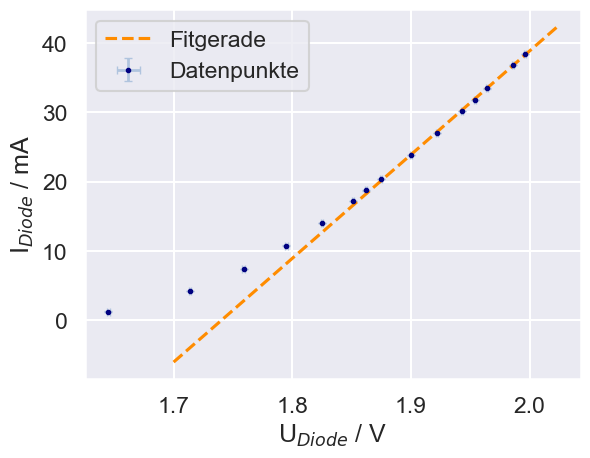

In [30]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("U$_{{Diode}}$ / V")
plt.ylabel("I$_{{Diode}}$ / mA")
plt.errorbar(x=data_red[" U Diode/V"], xerr=data_red["Error U Diode / V"], 
             y=data_red[" I Diode/mA"] , yerr=data_red["Error I Diode / mA"],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")

plt.plot(linear_fit_U, fit_function_plot(linear_fit_U,p_opt[0],p_opt[1]),"--", color="darkorange", label="Fitgerade")
plt.legend()
#plt.savefig("I_U_LED_roteLED_FIT.png", dpi=500,bbox_inches="tight")

In [31]:
d = ufloat(p_opt[1],p_err[1])
k = ufloat(p_opt[0],p_err[0])
U_d = -d/k
U_d

1.7405852465843157+/-0.026561710457634797

In [32]:
nu = e*U_d/h
nu

420871640117260.0+/-6422593013793.539

In [33]:
lambda_blue = c/nu
lambda_blue

7.123132789761604e-07+/-1.0870055981700343e-08

Diodenspannung bei I = 40mA für später

In [34]:
U_40mA = (40 - d)/k
U_40mA

2.007392535218029+/-0.028446595637729014

### Strom-Leistungskennlinie der Leuchtdiode

    Ablauf:
    1.) Lese Daten ein
    2.) inkludiere Fehler
    3.) ziehe Hintergrund ab
    4.) Plot der Kennlinie
    5.) Fit und daraus externe Quanteneffizienz bestimmen
    6.) Konversionsfaktor bestimmen

In [35]:
P_HGS = ufloat(0.075, 0.002) #Fehler im Laborbuch? Einheit: µW

In [36]:
ufloat(0.335,0.002) - P_HGS

0.26+/-0.00282842712474619

In [37]:
np.sqrt((0.002**2) + (0.002**2)) # little check if uncertainties does everything right

0.00282842712474619

In [38]:
data_P_vs_I = pd.read_csv("LED_rot_V_A_I.csv", encoding= 'unicode_escape')
data_P_vs_I

,U Verbraucher/V,U Diode/V,I Diode/mA,optische Leistung/µW,Leistung Hintergrund 0.075 µW,Unnamed: 5
0,2.0,1.645,1.22,0.335,NaN,NaN
1,3.0,1.714,4.14,1.800,NaN,NaN
2,4.0,1.759,7.35,4.020,NaN,NaN
3,5.0,1.795,10.76,6.810,NaN,NaN
4,6.0,1.825,14.02,9.710,NaN,NaN
5,7.0,1.851,17.22,12.680,NaN,NaN
6,7.5,1.862,18.73,14.140,NaN,NaN
7,8.0,1.875,20.40,15.730,NaN,NaN
8,9.0,1.900,23.85,19.000,NaN,NaN
9,10.0,1.922,27.07,22.000,NaN,NaN


In [39]:
# we only need I and P
data_P_vs_I.drop(data_P_vs_I.columns[len(data_P_vs_I.columns)-1], axis=1, inplace=True)
data_P_vs_I.drop(data_P_vs_I.columns[len(data_P_vs_I.columns)-1], axis=1, inplace=True)
data_P_vs_I.drop(data_P_vs_I.columns[0], axis=1, inplace=True)
data_P_vs_I.drop(data_P_vs_I.columns[0], axis=1, inplace=True)

In [40]:
data_P_vs_I

,I Diode/mA,optische Leistung/µW
0,1.22,0.335
1,4.14,1.800
2,7.35,4.020
3,10.76,6.810
4,14.02,9.710
5,17.22,12.680
6,18.73,14.140
7,20.40,15.730
8,23.85,19.000
9,27.07,22.000


In [41]:
data_P_vs_I["Error I Diode / mA"] = 0.01

In [42]:
# now we need the raw errors and then we calculate the HG corrigated optical power 
data_P_vs_I["Error P_0 raw/ µW"] = 0.02
data_P_vs_I["Error P_0 raw/ µW"][0] = 0.002
data_P_vs_I["Error P_0 raw/ µW"][8:] = 0.2

In [43]:
data_P_vs_I

,I Diode/mA,optische Leistung/µW,Error I Diode / mA,Error P_0 raw/ µW
0,1.22,0.335,0.01,0.002
1,4.14,1.800,0.01,0.020
2,7.35,4.020,0.01,0.020
3,10.76,6.810,0.01,0.020
4,14.02,9.710,0.01,0.020
5,17.22,12.680,0.01,0.020
6,18.73,14.140,0.01,0.020
7,20.40,15.730,0.01,0.020
8,23.85,19.000,0.01,0.200
9,27.07,22.000,0.01,0.200


In [44]:
data_P_vs_I["P_0 corr / µW"] = data_P_vs_I[" optische Leistung/µW"] - P_HGS.n
data_P_vs_I["Error P_0 corr / µW"] = np.sqrt((data_P_vs_I["Error P_0 raw/ µW"]**2) + (P_HGS.s**2))

In [45]:
data_P_vs_I

,I Diode/mA,optische Leistung/µW,Error I Diode / mA,Error P_0 raw/ µW,P_0 corr / µW,Error P_0 corr / µW
0,1.22,0.335,0.01,0.002,0.260,0.002828
1,4.14,1.800,0.01,0.020,1.725,0.020100
2,7.35,4.020,0.01,0.020,3.945,0.020100
3,10.76,6.810,0.01,0.020,6.735,0.020100
4,14.02,9.710,0.01,0.020,9.635,0.020100
5,17.22,12.680,0.01,0.020,12.605,0.020100
6,18.73,14.140,0.01,0.020,14.065,0.020100
7,20.40,15.730,0.01,0.020,15.655,0.020100
8,23.85,19.000,0.01,0.200,18.925,0.200010
9,27.07,22.000,0.01,0.200,21.925,0.200010


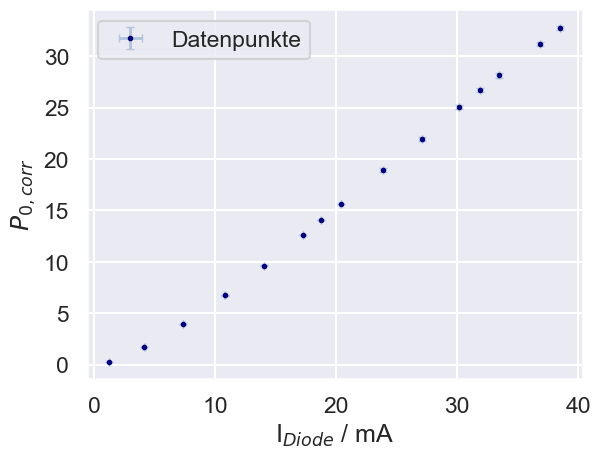

In [46]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("I$_{{Diode}}$ / mA")
plt.ylabel("$P_{0,corr}$")
plt.errorbar(x=data_P_vs_I[" I Diode/mA"], xerr=data_P_vs_I["Error I Diode / mA"], 
             y=data_P_vs_I["P_0 corr / µW"] , yerr=data_P_vs_I["Error P_0 corr / µW"],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.legend()
#plt.savefig("I_P_LED_roteLED.png", dpi=500,bbox_inches="tight")

This is what we want to fit:

$P_{\text{opt}} = \eta_{\text{ext}} \cdot \dfrac{I}{e} \cdot h \nu  \Rightarrow a \cdot I$

$a = \eta_{\text{ext}} \cdot \dfrac{h \nu}{e} $

In [47]:
nu_red = nu
nu_red

420871640117260.0+/-6422593013793.539

In [104]:
import scipy.optimize
#introduce also d
def fit_function(p,x):
    a,d = p
    return a*x + d

def fit_function_plot(x,a,d):
    return a*x + d

In [122]:
x_data_red = data_P_vs_I[" I Diode/mA"][3:].to_numpy()
x_red_er = data_P_vs_I["Error I Diode / mA"][3:].to_numpy()
y_data_red = data_P_vs_I["P_0 corr / µW"][3:].to_numpy()
y_red_er = data_P_vs_I["Error P_0 corr / µW"][3:].to_numpy()

In [123]:
# use ODR
from scipy import odr

data_odr_red = odr.RealData(x_data_red, y_data_red,
                    sx=x_red_er, sy=y_red_er)
odr = odr.ODR(data_odr_red, odr.Model(fit_function),beta0=[1.,1.])
out = odr.run()

In [124]:
p_opt = out.beta
p_err = out.sd_beta
red_chi_squared = out.res_var
print("fit parameter and 1-sigma error")
print("———————————–")
for i in range(len(p_opt)):
    print(str(p_opt[i]) + " +- " +str(p_err[i]))
print("———————————–")
print("reduced chi squared = ", red_chi_squared)

fit parameter and 1-sigma error
———————————–
0.9317688287033778 +- 0.005046642625657958
-3.3757987728347776 +- 0.08561203233273869
———————————–
reduced chi squared =  4.223619981798492


In [125]:
#create x for plotting with the linear fit
linear_fit_I = np.arange(0,38.5,0.001)

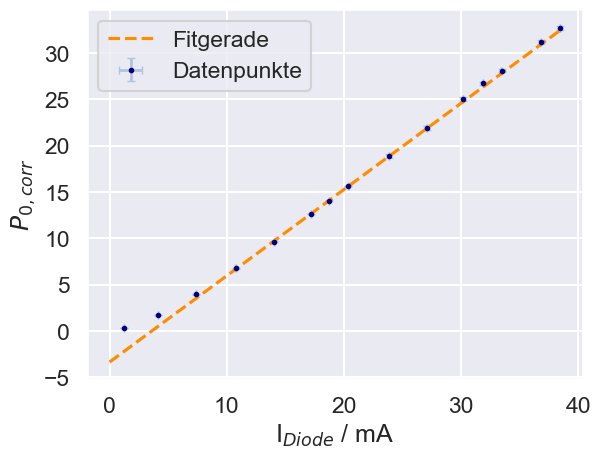

In [127]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("I$_{{Diode}}$ / mA")
plt.ylabel("$P_{0,corr}$")
plt.errorbar(x=data_P_vs_I[" I Diode/mA"], xerr=data_P_vs_I["Error I Diode / mA"], 
             y=data_P_vs_I["P_0 corr / µW"] , yerr=data_P_vs_I["Error P_0 corr / µW"],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")

plt.plot(linear_fit_I, fit_function_plot(linear_fit_I, p_opt[0],  p_opt[1]),"--", color="darkorange", label="Fitgerade")
plt.legend()
plt.savefig("I_P_LED_roteLED_FIT.png", dpi=500,bbox_inches="tight")

In [128]:
a = ufloat(p_opt[0], p_err[0])
a

0.9317688287033778+/-0.005046642625657958

$a = \eta_{\text{ext}} \cdot \dfrac{h \nu}{e} \Longrightarrow \eta_{\text{ext}} = a \cdot \dfrac{e}{h \nu}$

In [129]:
eta_ext = a * e * (1/(h*nu_red))
eta_ext

0.5353192729467628+/-0.008668361949680525

$\eta_{\text{k}} = \dfrac{P_0}{I_{\text{Diode}} \cdot U_{\text{Diode}}}$ für I = 40mA

$\eta_{\text{k}} = \dfrac{a \cdot I_{\text{Diode}}}{I_{\text{Diode}} \cdot U_{\text{Diode}}} = \dfrac{a}{U_{\text{Diode}}}$

In [130]:
eta_k = a/U_40mA
eta_k

0.4641687225374561+/-0.007041763929636841